## Get similarity between nodes

### Extract semantic features for each node

In [2]:
from graph_utils import networkx, extract_features_from_nx_graph

g_nx_ltown = networkx(r"D:\Master\Thesis\Code\L-Town\knowledge_graph-LTown.ttl")

In [3]:
node_features = extract_features_from_nx_graph(
    g_nx_ltown,
   "https://raw.githubusercontent.com/DiTEC-project/wdn-knowledge-graph/refs/heads/main/wdn_ontology.ttl",
    node_type_filter="Junction",  # Or full URI if you want
    attribute_keys=["baseDemand", "elevation"],
    edge_predicates=None
)

In [4]:
node_features

{'Junction_n95': {'baseDemand': 0.0, 'elevation': 25.4416},
 'Junction_n18': {'baseDemand': 2.01e-05, 'elevation': 67.142},
 'Junction_n305': {'baseDemand': 6.386944e-05, 'elevation': 25.4869},
 'Junction_n249': {'baseDemand': 1.256111e-05, 'elevation': 28.5347},
 'Junction_n663': {'baseDemand': 1.8775e-05, 'elevation': 25.7299},
 'Junction_n485': {'baseDemand': 3.055556e-06, 'elevation': 21.7743},
 'Junction_n201': {'baseDemand': 1.728056e-05, 'elevation': 19.106},
 'Junction_n606': {'baseDemand': 5.644444e-06, 'elevation': 16.4806},
 'Junction_n108': {'baseDemand': 0.0, 'elevation': 19.8166},
 'Junction_n127': {'baseDemand': 1.655556e-06, 'elevation': 19.1187},
 'Junction_n30': {'baseDemand': 8.49e-05, 'elevation': 75.3299},
 'Junction_n726': {'baseDemand': 1.578611e-05, 'elevation': 27.3736},
 'Junction_n689': {'baseDemand': 1.981389e-05, 'elevation': 26.2324},
 'Junction_n589': {'baseDemand': 0.0, 'elevation': 18.7},
 'Junction_n209': {'baseDemand': 0.0, 'elevation': 4.6117},
 'Jun

In [5]:
import pandas as pd
demands = pd.read_csv(r"D:\Master\Thesis\Code\L-Town\2018_SCADA_Demands.csv", sep = ";", decimal = ",") # Junctions demand Liters per hour (L/h) (nodeID)

In [13]:
demands

,Timestamp,n1,n2,n3,n4,n6,n7,n8,n9,n10,...,n379,n381,n382,n383,n384,n385,n386,n387,n388,n389
0,2018-01-01 00:00:00,40.83,112.23,96.71,131.29,166.18,81.92,249.95,489.63,58.83,...,33.41,150.82,67.61,65.82,65.25,57.39,214.20,81.49,256.50,92.14
1,2018-01-01 00:05:00,40.20,166.05,239.53,136.21,154.48,372.14,190.56,171.60,38.02,...,78.90,97.46,95.29,50.18,81.29,49.67,109.14,104.46,394.48,203.61
2,2018-01-01 00:10:00,38.06,121.91,69.12,131.00,160.10,320.79,242.07,39.35,52.79,...,100.26,135.33,178.10,63.74,252.94,9.69,285.82,94.32,337.33,93.11
3,2018-01-01 00:15:00,37.24,33.15,139.01,155.02,244.34,335.55,128.87,252.95,34.28,...,80.80,87.88,51.60,33.93,139.25,36.15,183.66,57.27,268.74,96.19
4,2018-01-01 00:20:00,45.38,122.55,72.13,148.66,257.18,382.41,259.25,318.29,69.56,...,59.57,178.33,79.05,68.27,43.76,22.05,226.42,140.88,423.29,96.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2018-12-31 23:35:00,117.46,167.89,124.12,1929.92,336.88,270.16,227.42,428.63,22.70,...,28.59,58.20,80.81,59.89,96.57,50.18,409.87,198.09,337.25,125.61
105116,2018-12-31 23:40:00,119.47,81.07,312.41,2042.10,261.50,332.87,295.73,543.91,64.40,...,52.32,165.10,137.53,77.87,225.10,40.81,285.58,163.48,380.56,214.91
105117,2018-12-31 23:45:00,203.61,208.57,132.87,2044.56,305.70,282.20,190.18,219.76,0.00,...,81.65,0.00,153.77,50.08,96.36,36.95,179.42,128.94,289.02,161.32
105118,2018-12-31 23:50:00,204.87,121.11,178.45,1993.61,117.58,442.95,136.33,393.23,41.82,...,100.77,107.21,157.36,35.90,0.00,55.11,259.01,150.83,389.79,159.76


In [24]:
# Select only nodes that are available in the sensor data
node_features_filtered = {
    node.split('_')[-1]: info for node, info in node_features.items() if node.split('_')[-1] in demands.columns
}
node_features_filtered

{'n18': {'baseDemand': 2.01e-05, 'elevation': 67.142},
 'n30': {'baseDemand': 8.49e-05, 'elevation': 75.3299},
 'n34': {'baseDemand': 3.12e-05, 'elevation': 65.8482},
 'n31': {'baseDemand': 3.23e-05, 'elevation': 65.0059},
 'n26': {'baseDemand': 1.3e-06, 'elevation': 61.6305},
 'n362': {'baseDemand': 1.6e-06, 'elevation': 74.0188},
 'n361': {'baseDemand': 3.15e-05, 'elevation': 65.4644},
 'n22': {'baseDemand': 4.19e-05, 'elevation': 76.1173},
 'n20': {'baseDemand': 4.01e-05, 'elevation': 65.9549},
 'n372': {'baseDemand': 1e-05, 'elevation': 65.8656},
 'n27': {'baseDemand': 3.63e-05, 'elevation': 65.7763},
 'n378': {'baseDemand': 3.8e-06, 'elevation': 68.9578},
 'n3': {'baseDemand': 5.3e-05, 'elevation': 73.1782},
 'n42': {'baseDemand': 6.75e-05, 'elevation': 61.0635},
 'n29': {'baseDemand': 1.36e-05, 'elevation': 71.5429},
 'n35': {'baseDemand': 0.0, 'elevation': 59.6258},
 'n349': {'baseDemand': 1.66e-05, 'elevation': 74.564},
 'n382': {'baseDemand': 4.1e-05, 'elevation': 72.7629},
 '

### Normalize and standardize features

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import LabelBinarizer
from itertools import combinations
import numpy as np

# Collect features
node_ids = list(node_features_filtered.keys())

# Prepare numeric features
baseDemands, elevations = [], []

for nid in node_ids:
    f = node_features_filtered[nid]

    baseDemands.append(f["baseDemand"])
    elevations.append(f["elevation"])

# Scale numeric and binary features
scaler = StandardScaler()
numeric_features = scaler.fit_transform(np.array([baseDemands, elevations]).T)



In [26]:
numeric_features

array([[-0.60879861, -0.13444244],
       [ 1.21011769,  1.43899704],
       [-0.29722499, -0.38306737],
       [-0.26634832, -0.54492915],
       [-1.1365089 , -1.19356771],
       [-1.12808799,  1.18704764],
       [-0.28880408, -0.45682084],
       [ 0.00312076,  1.59030889],
       [-0.04740469, -0.36256321],
       [-0.89230254, -0.37972367],
       [-0.15406954, -0.39688413],
       [-1.06633466,  0.21449335],
       [ 0.31469439,  1.02551254],
       [ 0.72170498, -1.30252607],
       [-0.79125164,  0.71126278],
       [-1.1729995 , -1.57880374],
       [-0.70704255,  1.29181678],
       [-0.02214197,  0.94570583],
       [-0.16529742,  1.06094803],
       [ 0.10417167, -1.14750541],
       [ 0.95468346, -1.00747374],
       [ 1.98203433,  0.27306568],
       [-0.31125984, -0.7722236 ],
       [ 0.21364348, -1.39305568],
       [ 0.15189015,  1.15916429],
       [-0.83054921, -0.00382692],
       [-1.0438789 , -0.93441206],
       [-0.17262669, -0.33083653],
       [-0.71546346,

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# assuming combined_features is your normalized feature matrix (NumPy array or DataFrame)
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numeric_features)
    inertias.append(kmeans.inertia_)


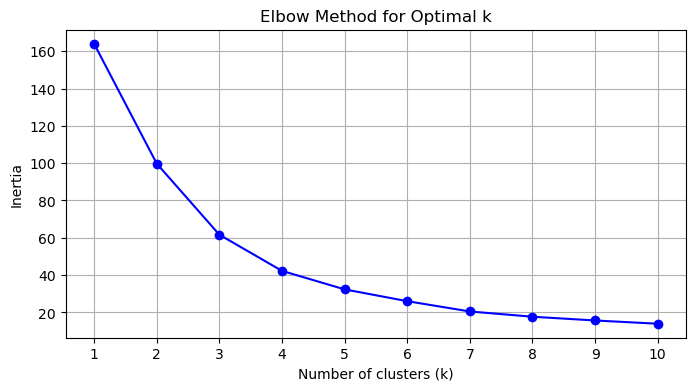

In [28]:
# Plotting the elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [34]:
# Cluster
from collections import defaultdict


kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(numeric_features)

pipe_clusters = dict(zip(node_ids, kmeans.labels_))
# 
clusters = defaultdict(list)
# Example: print each pipe with its assigned cluster
for pipe, cluster in pipe_clusters.items():
    clusters[cluster].append(pipe)

for cluster_id, pipes in clusters.items():
    print(f"Cluster {cluster_id}: {', '.join(sorted(pipes))}")


Cluster 3: n18, n20, n21, n23, n24, n25, n26, n27, n28, n31, n33, n34, n343, n35, n356, n361, n364, n365, n366, n367, n369, n370, n372, n373, n377, n385, n387, n389, n39, n4, n43, n44
Cluster 2: n30, n344, n351, n353, n358, n36, n381, n6, n7, n9
Cluster 0: n1, n10, n16, n19, n2, n22, n29, n3, n32, n345, n346, n347, n349, n350, n352, n354, n357, n362, n368, n371, n374, n375, n376, n378, n379, n382, n383, n384, n41
Cluster 1: n11, n13, n17, n355, n360, n386, n388, n40, n42, n45, n8


Si miramos el kg se ve que pipes 1 y 10 no se parecen a nivel semantico y vemos (en imputation_Brits) como los valores
medidos entre estos dos sensores son muy diferentes. Sin embargo, el clstering los ha metido en el mismo cluster. Parece que del 1 al 34 los valores no hacen mas que bajar? Mirar a ver si igual lo realmente importante son los nodes, los connected edges, o si lso semantic features pueden apprtar algo en algun caso.

Parece que lo que mas se correlaciona con el flow es el diamater, roughness y length parece tener menos peso. Probar también hacer el clusteres con variaciones de estos features. Aun asi insisito, con el modelo que se esta usando parece que siempre lo va a hacer mejor cuantos mas datos tenga.

Tambien pensar, si hay un sensor del que faltan TODOS o MUCHOS valores (otro tipo de missingness), quizas el modelo normal, no ha sido capaz
de encontrar correlaciones con otras columnas, y por tanto tira de media para hacer la imputation, y si se han usado todas las columnas sin distincion semnatica, puede ser que el rendimiento no sea bueno. En cambio, si con la misma missingness se usan solo features que son semanticamente relevantes, puede ser wue funcione mejor, ya que las features de las que aprende si estan relacionadas. PROBAR!!!